## Comparison of CAI, tAI and modelled translation efficiencies

In [16]:
import cPickle as pkl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from statsmodels.nonparametric.smoothers_lowess import lowess

### tRNA adaptation index (tAI)

From https://github.com/smsaladi/tAI:

In [2]:
import tAI

Probably for *E. coli* so handle with care:

In [3]:
tAI.tAI.trna_table().head()

,lowelab,codonR
codon,,
TTT,0,0
TTC,2,2
TTA,1,1
TTG,1,1
TCT,0,0


Codon Usage from http://www.kazusa.or.jp/codon/cgi-bin/showcodon.cgi?species=4932:

```
Saccharomyces cerevisiae [gbpln]: 14411 CDS's (6534504 codons)
fields: [triplet] [frequency: per thousand] ([number])
UUU 26.1(170666)  UCU 23.5(153557)  UAU 18.8(122728)  UGU  8.1( 52903)
UUC 18.4(120510)  UCC 14.2( 92923)  UAC 14.8( 96596)  UGC  4.8( 31095)
UUA 26.2(170884)  UCA 18.7(122028)  UAA  1.1(  6913)  UGA  0.7(  4447)
UUG 27.2(177573)  UCG  8.6( 55951)  UAG  0.5(  3312)  UGG 10.4( 67789)

CUU 12.3( 80076)  CCU 13.5( 88263)  CAU 13.6( 89007)  CGU  6.4( 41791)
CUC  5.4( 35545)  CCC  6.8( 44309)  CAC  7.8( 50785)  CGC  2.6( 16993)
CUA 13.4( 87619)  CCA 18.3(119641)  CAA 27.3(178251)  CGA  3.0( 19562)
CUG 10.5( 68494)  CCG  5.3( 34597)  CAG 12.1( 79121)  CGG  1.7( 11351)

AUU 30.1(196893)  ACU 20.3(132522)  AAU 35.7(233124)  AGU 14.2( 92466)
AUC 17.2(112176)  ACC 12.7( 83207)  AAC 24.8(162199)  AGC  9.8( 63726)
AUA 17.8(116254)  ACA 17.8(116084)  AAA 41.9(273618)  AGA 21.3(139081)
AUG 20.9(136805)  ACG  8.0( 52045)  AAG 30.8(201361)  AGG  9.2( 60289)

GUU 22.1(144243)  GCU 21.2(138358)  GAU 37.6(245641)  GGU 23.9(156109)
GUC 11.8( 76947)  GCC 12.6( 82357)  GAC 20.2(132048)  GGC  9.8( 63903)
GUA 11.8( 76927)  GCA 16.2(105910)  GAA 45.6(297944)  GGA 10.9( 71216)
GUG 10.8( 70337)  GCG  6.2( 40358)  GAG 19.2(125717)  GGG  6.0( 39359)
```

In [4]:
tRNA_types = {
    1: {'anticodon': 'ugc', 'abundancy': 55351},  # reverse complement the anticodon to look it up
    2: {'anticodon': 'agc', 'abundancy': 121771},
    3: {'anticodon': 'ucu', 'abundancy': 121771},
    4: {'anticodon': 'ccu', 'abundancy': 11070},
    5: {'anticodon': 'ccg', 'abundancy': 11070},
    6: {'anticodon': 'acg', 'abundancy': 66421},
    7: {'anticodon': 'guu', 'abundancy': 110701},
    8: {'anticodon': 'guc', 'abundancy': 177122},
    9: {'anticodon': 'gca', 'abundancy': 44280},
    10: {'anticodon': 'uug', 'abundancy': 88561},
    11: {'anticodon': 'cug', 'abundancy': 11070},
    12: {'anticodon': 'uuc', 'abundancy': 154982},
    13: {'anticodon': 'ucc', 'abundancy': 33210},
    14: {'anticodon': 'ccc', 'abundancy': 22140},
    15: {'anticodon': 'gcc', 'abundancy': 177122},
    16: {'anticodon': 'gug', 'abundancy': 77491},
    17: {'anticodon': 'uau', 'abundancy': 22140},
    18: {'anticodon': 'aau', 'abundancy': 143911},
    19: {'anticodon': 'uag', 'abundancy': 33210},
    20: {'anticodon': 'gag', 'abundancy': 11070},
    21: {'anticodon': 'uaa', 'abundancy': 77491},
    22: {'anticodon': 'caa', 'abundancy': 110701},
    23: {'anticodon': 'uuu', 'abundancy': 77491},
    24: {'anticodon': 'cuu', 'abundancy': 154982},
    25: {'anticodon': 'cau', 'abundancy': 55351},  # 26 does not seem to exist
    27: {'anticodon': 'gaa', 'abundancy': 110701},
    28: {'anticodon': 'agg', 'abundancy': 22140},
    29: {'anticodon': 'ugg', 'abundancy': 110701},
    30: {'anticodon': 'gcu', 'abundancy': 33210},
    31: {'anticodon': 'uga', 'abundancy': 33210},
    32: {'anticodon': 'aga', 'abundancy': 121771},
    33: {'anticodon': 'cga', 'abundancy': 11070},
    34: {'anticodon': 'ugu', 'abundancy': 44280},
    35: {'anticodon': 'agu', 'abundancy': 121771},
    36: {'anticodon': 'cgu', 'abundancy': 11070},
    37: {'anticodon': 'cca', 'abundancy': 66421},
    38: {'anticodon': 'gua', 'abundancy': 88561},
    39: {'anticodon': 'uac', 'abundancy': 22140},
    40: {'anticodon': 'aac', 'abundancy': 154982},
    41: {'anticodon': 'cac', 'abundancy': 22140},
    42: {'anticodon': '*', 'abundancy': 18000},  # termination factor
    43: {'anticodon': 'cuc', 'abundancy': 22140}
}

In [5]:
codon_anticodon = {
    'uuu': 'gaa', 'ucu': 'aga', 'uau': 'gua', 'ugu': 'gca',
    'uuc': 'gaa', 'ucc': 'aga', 'uac': 'gua', 'ugc': 'gca',
    'uua': 'uaa', 'uca': 'uga', 'uaa': '*', 'uga': '*',  # '*'==stop
    'uug': 'caa', 'ucg': 'cga', 'uag': '*', 'ugg': 'cca',
    'cuu': 'gag', 'ccu': 'agg', 'cau': 'gug', 'cgu': 'acg',
    'cuc': 'gag', 'ccc': 'agg', 'cac': 'gug', 'cgc': 'acg',
    'cua': 'uag', 'cca': 'ugg', 'caa': 'uug', 'cga': 'acg',
    'cug': 'uag', 'ccg': 'ugg', 'cag': 'cug', 'cgg': 'ccg',
    'auu': 'aau', 'acu': 'agu', 'aau': 'guu', 'agu': 'gcu',
    'auc': 'aau', 'acc': 'agu', 'aac': 'guu', 'agc': 'gcu',
    'aua': 'uau', 'aca': 'ugu', 'aaa': 'uuu', 'aga': 'ucu',
    'aug': 'cau', 'acg': 'cgu', 'aag': 'cuu', 'agg': 'ccu',
    'guu': 'aac', 'gcu': 'agc', 'gau': 'guc', 'ggu': 'gcc',
    'guc': 'aac', 'gcc': 'agc', 'gac': 'guc', 'ggc': 'gcc',
    'gua': 'uac', 'gca': 'ugc', 'gaa': 'uuc', 'gga': 'ucc',
    'gug': 'cac', 'gcg': 'ugc', 'gag': 'cuc', 'ggg': 'ccc'
}

From https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/03%20TRSL_check_observables.ipynb:

In [6]:
anticodon_tRNA_abundancy = {tRNA_types[id]['anticodon']: tRNA_types[id]['abundancy'] for id in tRNA_types}

In [8]:
codon_tRNA_abundancy = {codon: anticodon_tRNA_abundancy[codon_anticodon[codon]] for codon in codon_anticodon}
#codon_tRNA_abundancy

Delete stop codons:

In [9]:
del codon_tRNA_abundancy['uaa']
del codon_tRNA_abundancy['uga']
del codon_tRNA_abundancy['uag']

In [10]:
orfs = pkl.load(open("../../parameters/orf_coding.p", "rb"))

Test case (SWI5, YDR146C):

In [11]:
nucseq = orfs['YDR146C']
nucseq[:60]

'auggauacaucaaacucuugguuugaugccucaaaaguacaaagccuaaauuuugaccua'

In [12]:
tAI.calc_tAI(nucseq, ref_trna=codon_tRNA_abundancy, recalc_weights=True, omit_first=True, bacteria=False, 
             optimized_weights=True, keep_codonR_err=True, )

0.28820590352954201

Import tAIs from R:

In [13]:
with open('/home/martin/git/TRSL/workbooks/analyses/tAI_misc/yeast.json','r') as inf:
    tAI_dict_R = eval(inf.read())

In [14]:
tAI_dict_R['YDR146C']

0.33496

In [15]:
tAI_dict_python = {}

for key in orfs:
    # just to measure progress:
    #print key,
    tAI_dict_python[key] = tAI.calc_tAI(orfs[key], ref_trna=codon_tRNA_abundancy, recalc_weights=True, 
                                        omit_first=True, bacteria=False, optimized_weights=True, 
                                        keep_codonR_err=True, )

In [19]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, alpha=0.2):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-', color = '0.75')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys)
    scat.set_alpha(alpha)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    plt.show()

5917


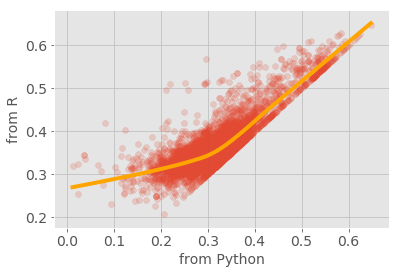

In [20]:
scatter_dicts(tAI_dict_python, tAI_dict_R, "from Python", "from R", 14)

Interesting - TODO!!!

### Codon Adaptation Index (CAI)

This is the tRNA independent version.

TODO: improve on https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/04%20TRSL_analysis_by_CAI.ipynb